In [0]:
import os
import numpy as np
import glob
import shutil
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [6]:
URL = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
zip_file = tf.keras.utils.get_file(origin=URL,
                                   fname="flower_photos.tgz",
                                   extract=True)
base_dir = os.path.join(os.path.dirname(zip_file), 'flower_photos')

228818944/228813984 [==============================] - 4s 0us/step


In [0]:
classes = ['roses', 'daisy', 'dandelion', 'sunflowers', 'tulips']

In [8]:
for cl in classes:
  img_path = os.path.join(base_dir, cl)
  images = glob.glob(img_path + '/*.jpg')
  print("{}: {} Images".format(cl, len(images)))
  train, val = images[:round(len(images)*0.8)], images[round(len(images)*0.8):]

  for t in train:
    if not os.path.exists(os.path.join(base_dir, 'train', cl)):
      os.makedirs(os.path.join(base_dir, 'train', cl))
    shutil.move(t, os.path.join(base_dir, 'train', cl))

  for v in val:
    if not os.path.exists(os.path.join(base_dir, 'val', cl)):
      os.makedirs(os.path.join(base_dir, 'val', cl))
    shutil.move(v, os.path.join(base_dir, 'val', cl))

roses: 641 Images
daisy: 633 Images
dandelion: 898 Images
sunflowers: 699 Images
tulips: 799 Images


In [0]:
train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, 'val')

In [0]:
batch_size = 100
IMG_SHAPE = 150

In [11]:
image_gen = ImageDataGenerator(rescale = 1./255, horizontal_flip = True)
train_data_gen = image_gen.flow_from_directory(
    batch_size = batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_SHAPE, IMG_SHAPE)
)

Found 2935 images belonging to 5 classes.


In [0]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

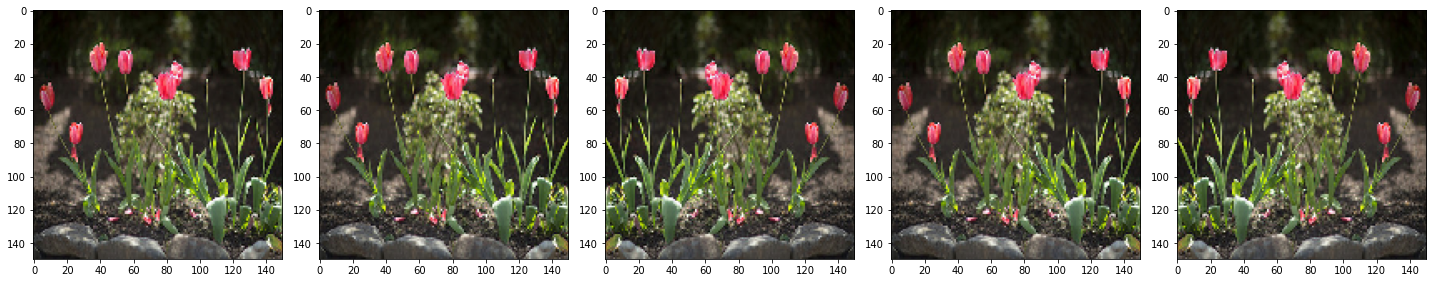

In [13]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [14]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True, rotation_range=45)
train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    shuffle=True,
    directory = train_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE)
)

Found 2935 images belonging to 5 classes.


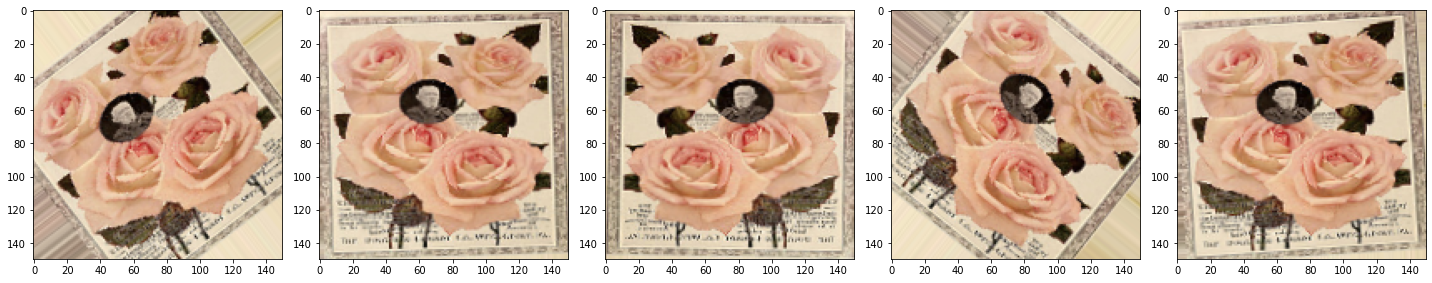

In [15]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [18]:
image_gen = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    horizontal_flip = True,
    zoom_range = 0.5
)

train_data_gen = image_gen.flow_from_directory(
    batch_size=batch_size,
    directory = train_dir,
    shuffle = True,
    target_size = (IMG_SHAPE, IMG_SHAPE)
)

Found 2935 images belonging to 5 classes.


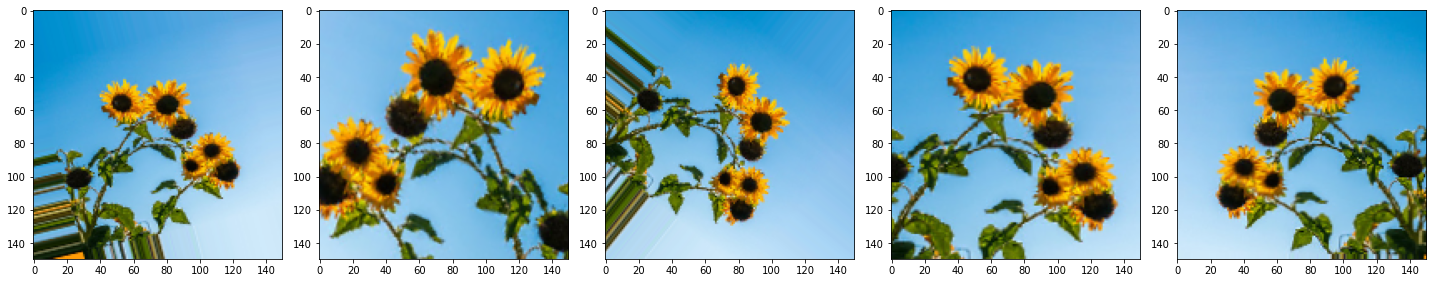

In [19]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [25]:
image_gen_train = ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 45,
    zoom_range = 0.5,
    horizontal_flip = True,
    width_shift_range = 0.15,
    height_shift_range = 0.15
)

train_data_gen = image_gen_train.flow_from_directory(
    batch_size=batch_size,
    directory = train_dir,
    target_size = (IMG_SHAPE, IMG_SHAPE),
    shuffle = True,
    class_mode = 'sparse'
)

Found 2935 images belonging to 5 classes.


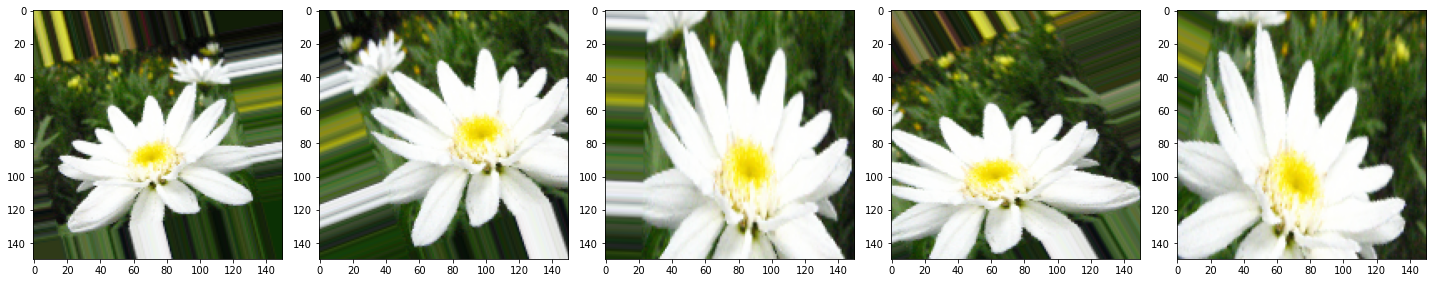

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [28]:
image_gen_val = ImageDataGenerator(
    rescale = 1./255
)
val_data_gen = image_gen_val.flow_from_directory(
    batch_size = batch_size,
    directory = val_dir,
    class_mode = 'sparse',
    target_size = (IMG_SHAPE, IMG_SHAPE)
)

Found 735 images belonging to 5 classes.


In [0]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, 3, padding = 'same', input_shape = (IMG_SHAPE,IMG_SHAPE,3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(32, 3, padding='same', activation = 'relu'),
    tf.keras.layers.MaxPooling2D((2,2)),
    tf.keras.layers.Conv2D(64, 3, padding = 'same', activation = 'relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [0]:
model.compile(optimizer='adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics = ['accuracy'])

In [39]:
epochs = 80
history = history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(train_data_gen.n / float(batch_size))),
    epochs=epochs,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(val_data_gen.n / float(batch_size)))
)

Epoch 1/80
30/30 [==============================] - 22s 722ms/step - loss: 1.5613 - accuracy: 0.3090 - val_loss: 1.4678 - val_accuracy: 0.4259
Epoch 2/80
30/30 [==============================] - 22s 723ms/step - loss: 1.4581 - accuracy: 0.4385 - val_loss: 1.4418 - val_accuracy: 0.4503
Epoch 3/80
30/30 [==============================] - 22s 727ms/step - loss: 1.4392 - accuracy: 0.4528 - val_loss: 1.3932 - val_accuracy: 0.5061
Epoch 4/80
30/30 [==============================] - 22s 728ms/step - loss: 1.4089 - accuracy: 0.4852 - val_loss: 1.4152 - val_accuracy: 0.4789
Epoch 5/80
30/30 [==============================] - 22s 735ms/step - loss: 1.3960 - accuracy: 0.5022 - val_loss: 1.3874 - val_accuracy: 0.5116
Epoch 6/80
30/30 [==============================] - 22s 728ms/step - loss: 1.3913 - accuracy: 0.5032 - val_loss: 1.3622 - val_accuracy: 0.5320
Epoch 7/80
30/30 [==============================] - 22s 728ms/step - loss: 1.3724 - accuracy: 0.5230 - val_loss: 1.3557 - val_accuracy: 0.5361

In [1]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

NameError: ignored

In [42]:
print(acc)

[0.3090289533138275, 0.43850085139274597, 0.4528109133243561, 0.4851788878440857, 0.5022146701812744, 0.5032367706298828, 0.5229982733726501, 0.5195911526679993, 0.5788756608963013, 0.6132879257202148, 0.6020442843437195, 0.6146507859230042, 0.6194207668304443, 0.6449744701385498, 0.6098807454109192, 0.6323679685592651, 0.6364565491676331, 0.6582623720169067, 0.6613287925720215, 0.6647359728813171, 0.6691652536392212, 0.686541736125946, 0.677342414855957, 0.6899489164352417, 0.6896081566810608, 0.6851788759231567, 0.7015331983566284, 0.6875638961791992, 0.699829638004303, 0.6896081566810608, 0.6862010359764099, 0.7001703381538391, 0.7165247201919556, 0.7093696594238281, 0.7039182186126709, 0.7039182186126709, 0.7032368183135986, 0.7080067992210388, 0.6974446177482605, 0.7199318408966064, 0.7100511193275452, 0.7144804000854492, 0.7168654203414917, 0.7049403786659241, 0.7035775184631348, 0.7284497618675232, 0.713458240032196, 0.7250425815582275, 0.7219761610031128, 0.7226575613021851, 0.